##1: Librairies

In [ ]:
import urllib3
from bs4 import BeautifulSoup
import nltk

In [ ]:
#Get the content of a url
http = urllib3.PoolManager()
url = 'https://store.epicgames.com/en-US/'
response = http.request('Get', url)
print(response)

In [ ]:
htmlContent = BeautifulSoup(response.data,'html.parser')
htmlContent

<html>
<head>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<style>@media screen and (max-width:374px){h1{font-size:18px}.cf_challenge_container{margin:25px;padding:25px}.cf_challenge_text{font-size:16px}}@media screen and (min-width:375px) and (max-width:1279px){h1{font-size:30px}.cf_challenge_container{margin:25px;padding:60px}.cf_challenge_text{font-size:16px}}@media screen and (min-width:1280px){h1{font-size:40px}.cf_challenge_container{margin:25px;padding:60px}.cf_challenge_text{font-size:18px}}@media screen and (min-width:1920px){h1{font-size:50px}}.cf_challenge_text_small{font-size:11px}*,:after :before{-webkit-font-smoothing:antialiased;-webkit-touch-callout:none;-moz-osx-font-smoothing:grayscale;box-sizing:border-box;text-size-adjust:100%}body{height:100vh;width:100vw;overflow-x:hidden;font-family:sans-serif;font-weight:400;font-size:14px;line-height:20px;letter-spacing:.2px;color:hsla(0,0%,100%,.5);margin:0;background:#121212;display:flex;flex-directio

## Tokenisation

### Text extraction

In [ ]:
#Get text only
htmlContent2 = htmlContent.get_text()
htmlContent2

'\n\n\n@media screen and (max-width:374px){h1{font-size:18px}.cf_challenge_container{margin:25px;padding:25px}.cf_challenge_text{font-size:16px}}@media screen and (min-width:375px) and (max-width:1279px){h1{font-size:30px}.cf_challenge_container{margin:25px;padding:60px}.cf_challenge_text{font-size:16px}}@media screen and (min-width:1280px){h1{font-size:40px}.cf_challenge_container{margin:25px;padding:60px}.cf_challenge_text{font-size:18px}}@media screen and (min-width:1920px){h1{font-size:50px}}.cf_challenge_text_small{font-size:11px}*,:after :before{-webkit-font-smoothing:antialiased;-webkit-touch-callout:none;-moz-osx-font-smoothing:grayscale;box-sizing:border-box;text-size-adjust:100%}body{height:100vh;width:100vw;overflow-x:hidden;font-family:sans-serif;font-weight:400;font-size:14px;line-height:20px;letter-spacing:.2px;color:hsla(0,0%,100%,.5);margin:0;background:#121212;display:flex;flex-direction:column;justify-content:center;align-items:center}.logo{padding-bottom:25px}.logo,s

There are many Javascript tokens. We need to remove them.

### Removal of javascripts tokens

In [ ]:
#kill all script and style elements
for script in htmlContent(["script","style"]):
  script.decompose() #rip it out

In [ ]:
htmlContent2 = htmlContent.get_text()

In [ ]:
tokens = htmlContent2.split()
print(tokens[0:100])

['Please', 'stand', 'by,', 'while', 'we', 'are', 'checking', 'your', 'browser...', 'Redirecting...', 'Please', 'turn', 'JavaScript', 'on', 'and', 'reload', 'the', 'page.', 'Please', 'enable', 'Cookies', 'and', 'reload', 'the', 'page.', ':', '7a4b294f2e85a9ad', ':', '35.236.161.82']


In [ ]:
import operator
freq_dis = {}
for tok in tokens:
  if tok in freq_dis:
    freq_dis[tok] += 1
  else:
    freq_dis[tok] = 1

sorted_freq_dis = sorted(freq_dis.items(), key = operator.itemgetter(1), reverse = True)
sorted_freq_dis[0:10]


[('Please', 3),
 ('and', 2),
 ('reload', 2),
 ('the', 2),
 ('page.', 2),
 (':', 2),
 ('stand', 1),
 ('by,', 1),
 ('while', 1),
 ('we', 1)]

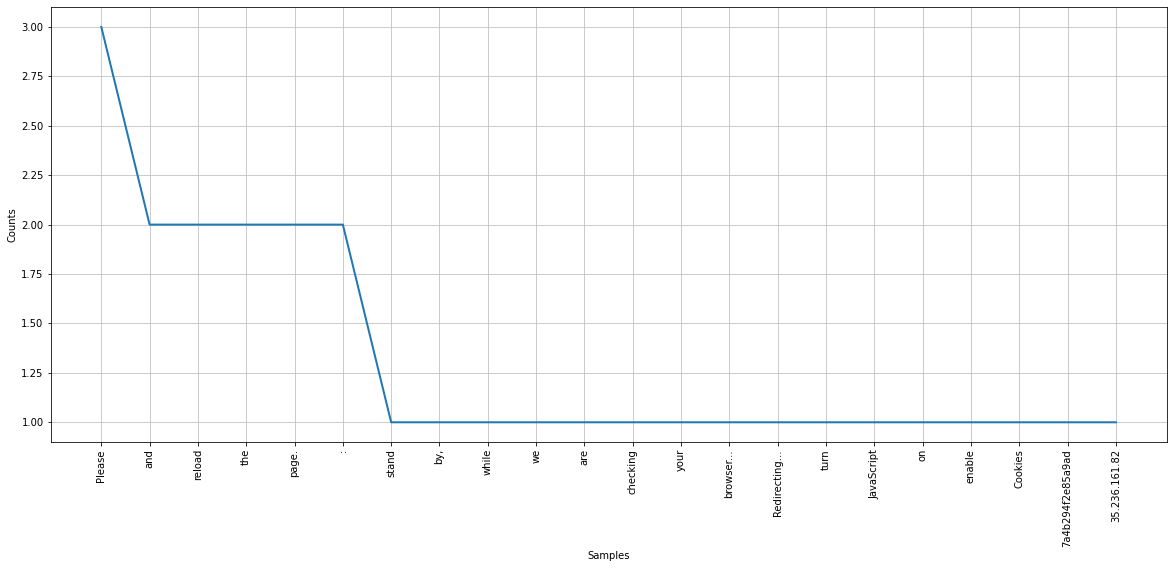

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
freq_dis_nltk = nltk.FreqDist(tokens)
freq_dis_nltk.plot(50, cumulative = False)

We need to remove the stopwords

### Stopwords removal

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#english
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
clean_tokens = [tok for tok in tokens if len(tok.lower()) > 1 and (tok.lower() not in stopwords)]

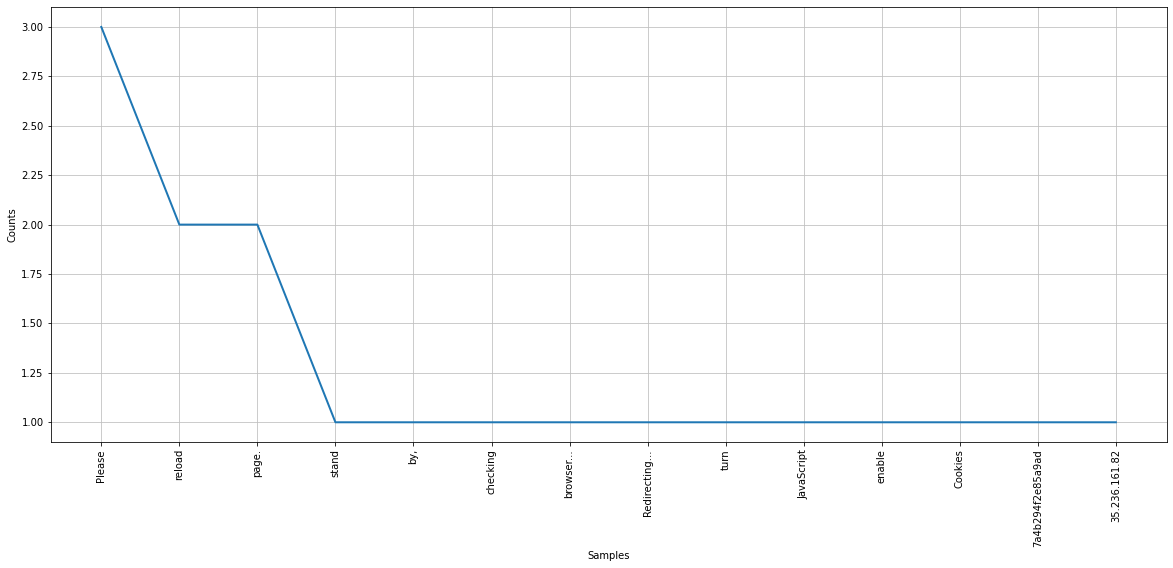

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
freq_dis_nltk = nltk.FreqDist(clean_tokens)
freq_dis_nltk.plot(50, cumulative = False)

## Word cloud visualisation

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud().generate_from_frequencies(freq_dis_nltk)

(-0.5, 399.5, 199.5, -0.5)

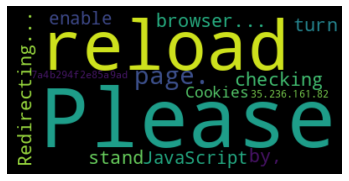

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(wc, interpolation= 'bilinear')
plt.axis('off')